# PCA analaysis

## Installing requirements

In [90]:
#pip install numpy pandas matplotlib scikit-learn seaborn

## Applying PCA with 2 dimensions

In [91]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
address = "C:\\Users\\Abdo\\OneDrive - Faculty of Engineering Ain Shams University\\Desktop\\Personal\\learning\\Sprint_Up_AI\\Heart_disease_project\\data\\data.csv"
df_scaled = pd.read_csv(address) # Exclude the target column
df_scaled = df_scaled.drop(columns=['num'])  # Assuming 'target' is the column to be excluded
print(df_scaled.head())
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
'''print("Explained variance ratio:", pca.explained_variance_ratio_)
print(df_pca.head())'''

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  1.019996  0.680946 -2.152509  0.995001 -0.208619  2.634273  1.042919   
1  1.463546  0.680946  0.912477 -0.618980 -0.298702 -0.379611  1.042919   
2 -1.863079  0.680946 -0.109185  0.026612  0.174236 -0.379611 -0.966234   
3 -1.419529 -1.468546 -1.130847  0.026612 -0.861724 -0.379611  1.042919   
4  0.243783  0.680946 -1.130847 -0.618980 -0.141056 -0.379611 -0.966234   

    thalach     exang   oldpeak     slope        ca      thal  
0 -0.045833 -0.674949  1.300852  2.365950 -0.705921  0.721121  
1 -0.979814  1.481594  1.590340  0.717336  2.075300  1.243038  
2  1.599751 -0.674949  2.458803  2.365950 -0.705921 -0.844628  
3  0.932622 -0.674949  0.432390 -0.931278 -0.705921 -0.844628  
4  1.199474 -0.674949 -0.146585 -0.931278 -0.705921 -0.844628  


'print("Explained variance ratio:", pca.explained_variance_ratio_)\nprint(df_pca.head())'

## Determining the optimal number of dimensions

In [92]:
from matplotlib import pyplot as plt
import numpy as np
cov_matrix= np.cov(df_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigen_pairs= [(eigenvalues[i], eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs_sorted = sorted(eigen_pairs, key=lambda val:val[0], reverse=True)
sorted_eigenvalues = np.array([pair[0] for pair in eigen_pairs_sorted])
sorted_eigenvectors = np.array([pair[1] for pair in eigen_pairs_sorted])
print(f"Eigenvalues: {sorted_eigenvalues} \nEigenvectors: {sorted_eigenvectors}")
total_variance = sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues/ total_variance 
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(f"Explained variance ratio: {explained_variance_ratio} \nCumulative explained variance: {cumulative_explained_variance}")

Eigenvalues: [3.05251974 1.57737326 1.27088674 1.11725375 1.02414425 0.90670595
 0.82675726 0.78256542 0.68482404 0.58474153 0.45331544 0.39871549
 0.37000556] 
Eigenvectors: [[ 0.26504935  0.17760217  0.28509867  0.10425772  0.01992778  0.06025252
   0.1309828  -0.40560447  0.37109743  0.39612315  0.33392335  0.2836839
   0.36571602]
 [-0.49555909  0.33957844  0.20352056 -0.4439312  -0.34313659 -0.25963183
  -0.25607213  0.03163406  0.20664859  0.02906417  0.04913975 -0.21911207
   0.23433715]
 [ 0.08110623 -0.46691893  0.42138495 -0.30354666  0.3496535  -0.47020423
  -0.06328452 -0.20217297  0.18694952 -0.1450039  -0.14728907  0.08441332
  -0.18077133]
 [-0.11972434 -0.3911878  -0.14045755  0.00087894 -0.18132751 -0.10287328
   0.16158324 -0.12446022 -0.00751369  0.3018273   0.59451978 -0.43313003
  -0.30924984]
 [-0.29424177  0.23633551  0.07898355  0.21086741  0.4623242  -0.18444559
   0.62929355  0.21385715  0.16945959 -0.03076245 -0.03391231 -0.27645766
   0.10056337]
 [-0.093032

## Testing using either scree plot or cumulative plot

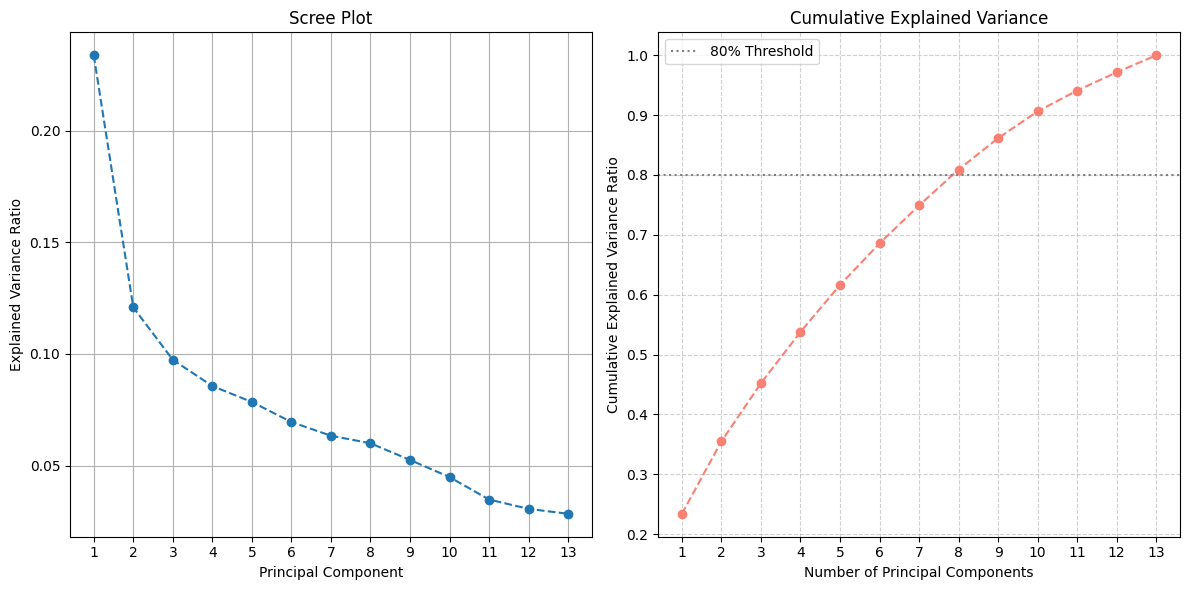

In [93]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
         marker='o', linestyle='--', color='salmon')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0.8, color='gray', linestyle=':', label='80% Threshold')
plt.legend()

plt.tight_layout()
plt.show()

## Projecting the data on the new PCs

In [100]:
# Projecting the data on the new PCs(7 dimensions)
final_principal_components = sorted_eigenvectors[:,:7]
projected_data = np.dot(df_scaled, final_principal_components)
df_projected = pd.DataFrame(data=projected_data, columns=[f'PC{i+1}' for i in range(7)])
print(df_projected.describe())
df_projected.info()

                PC1           PC2           PC3           PC4           PC5  \
count  2.620000e+02  2.620000e+02  2.620000e+02  2.620000e+02  2.620000e+02   
mean  -1.084798e-16 -1.389898e-16  3.050995e-17 -7.796986e-17 -8.135986e-17   
std    9.033408e-01  9.140429e-01  7.995609e-01  1.103522e+00  1.052694e+00   
min   -2.508506e+00 -2.692209e+00 -2.512883e+00 -3.092250e+00 -2.519982e+00   
25%   -5.614747e-01 -5.685035e-01 -4.965892e-01 -8.320231e-01 -6.177706e-01   
50%   -7.971866e-02 -6.335272e-02  3.223987e-02  1.195559e-01  8.336976e-02   
75%    5.943021e-01  5.927352e-01  5.472903e-01  8.036857e-01  6.661887e-01   
max    2.388576e+00  2.834431e+00  2.262813e+00  2.484147e+00  2.757420e+00   

                PC6           PC7  
count  2.620000e+02  2.620000e+02  
mean   6.779988e-17  3.389994e-17  
std    1.068826e+00  1.092162e+00  
min   -2.210209e+00 -2.401528e+00  
25%   -7.956368e-01 -9.107834e-01  
50%   -2.779892e-02 -9.764140e-03  
75%    6.867931e-01  6.546056e-01  
